In [1]:
import pandas as pd # dataframes
import numpy as np # matrices and linear algebra
import matplotlib.pyplot as plt # plotting
import seaborn as sns # another matplotlib interface - styled and easier to use

In [2]:
df = pd.read_csv('../data/bank_marketing_dataset.csv', sep=',')
df.age.describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

# Columns
    1 - age (numeric)
    2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
    3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
    4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
    5 - default: has credit in default? (categorical: 'no','yes','unknown')
    6 - housing: has housing loan? (categorical: 'no','yes','unknown')
    7 - loan: has personal loan? (categorical: 'no','yes','unknown')
    Related with the last contact of the current campaign:
    
    8 - contact: contact communication type (categorical: 'cellular','telephone')
    9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', …, 'nov', 'dec')
    10 - dayofweek: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
    11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the     duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes     and should be discarded if the intention is to have a realistic predictive model.
    Other attributes:
    
    12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
    14 - previous: number of contacts performed before this campaign and for this client (numeric)
    15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
    Social and economic context attributes
    
    16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
    17 - cons.price.idx: consumer price index - monthly indicator (numeric) = The Consumer Price Index (CPI) is a measure that examines the weighted average of prices of a basket of consumer goods and services, such as transportation, food, and medical care. It is calculated by taking price changes for each item in the predetermined basket of goods and averaging them. Changes in the CPI are used to assess price changes associated with the cost of living. 

    18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) = The Consumer Confidence Index (CCI) is a survey, administered by The Conference Board, that measures how optimistic or pessimistic consumers are regarding their expected financial situation. The CCI is based on the premise that if consumers are optimistic, they will spend more and stimulate the economy but if they are pessimistic then their spending patterns could lead to a recession. 

    19 - euribor3m: euribor 3 month rate - daily indicator (numeric) = he 3 month Euribor interest rate is the interest rate at which a selection of European banks lend one another funds denominated in euros whereby the loans have a maturity of 3 months. Alongside the 3 month Euribor interest rate we have another 14 Euribor interest rates with different maturities (see the links at the bottom of this page). The Euribor interest rates are the most important European interbank interest rates. When the Euribor interest rates rise or fall (substantially) there is a high likelihood that the interest rates on banking products such as mortgages, savings accounts and loans will also be adjusted.
    
    20 - nr.employed: number of employees - quarterly indicator (numeric)
    21 - subscribed : has the client subscribed a term deposit? (binary: 'yes','no') =  A term deposit is a fixed-term investment that includes the deposit of money into an account at a financial institution. Term deposit investments usually carry short-term maturities ranging from one month to a few years and will have varying levels of required minimum deposits.

    The investor must understand when buying a term deposit that they can withdraw their funds  only after the term ends. In some cases, the account holder may allow the investor early     termination—or withdrawal—if they give several days notification. Also, there will be a     penalty assessed for early termination. 

# Points of interest
First ideas


## Clients
* Age 
* Each Job count
* Marital status count
* Education count
* Housing count
* Loans count
* Credit count
* How looks common client

## Relations
* Duration of the call, longer = more interest, How many people were intrested based on some mean of call duration
* Has duration effect on the final subscription
* Do retired people have more patient for duration of the call.
* Do retired people have more loans then current generation.
* Which type of work has most loans charged
* Which groups are contacted the most, is anyone prefered
* Contacts by month
* Contacts by day
* Based on the job which day did they contacted them
* Who are the common investor
* Which of groups by job or education has loans
*   

## Age graph with mean red line

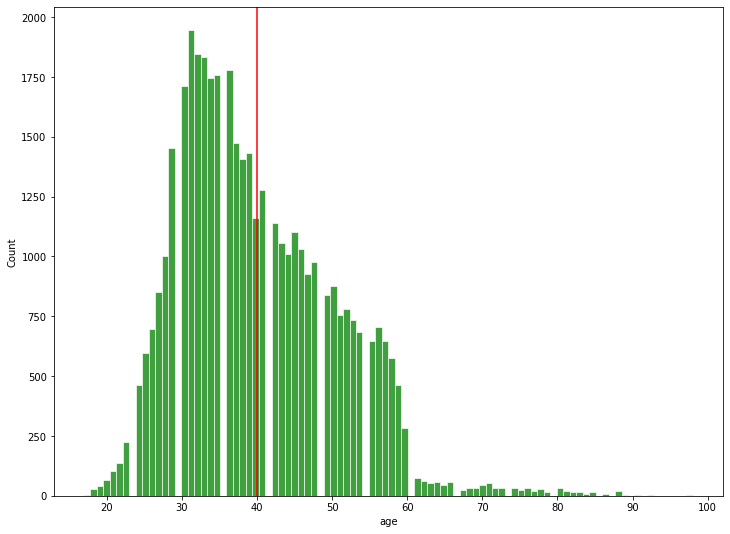

In [3]:
fig = plt.figure(figsize=(12, 9))
sns.histplot(df.age, edgecolor='white', color='green' )
plt.axvline(df.age.mean(), color='red')
# plt.axvline(df.SalePrice.quantile(0.75), color='red')

## Boxblot based on age and job
I am just interested

<AxesSubplot:xlabel='job', ylabel='age'>

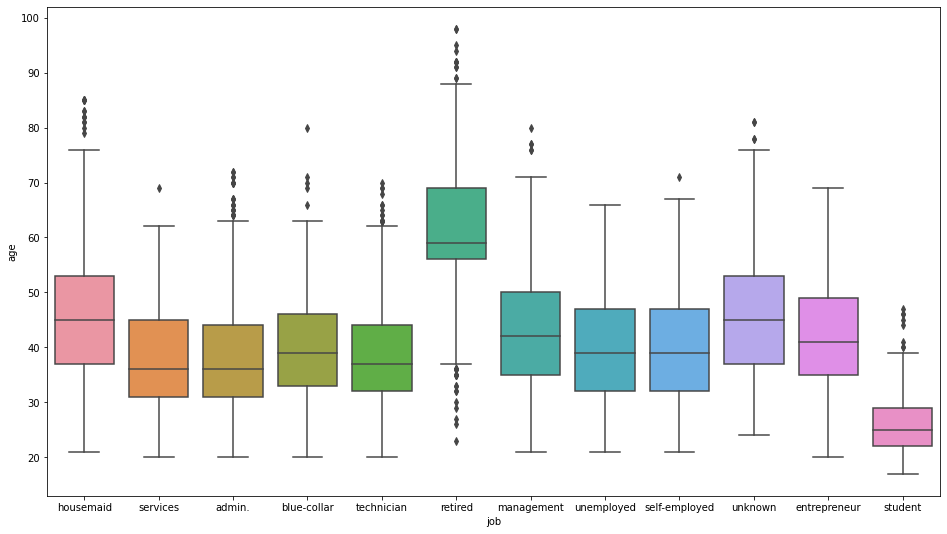

In [4]:
fig = plt.figure(figsize=(16, 9))
sns.boxplot(data=df, y='age', x='job')

## Any mising values others then unknow?

In [5]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribed        0
dtype: int64

## Jobs overview

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

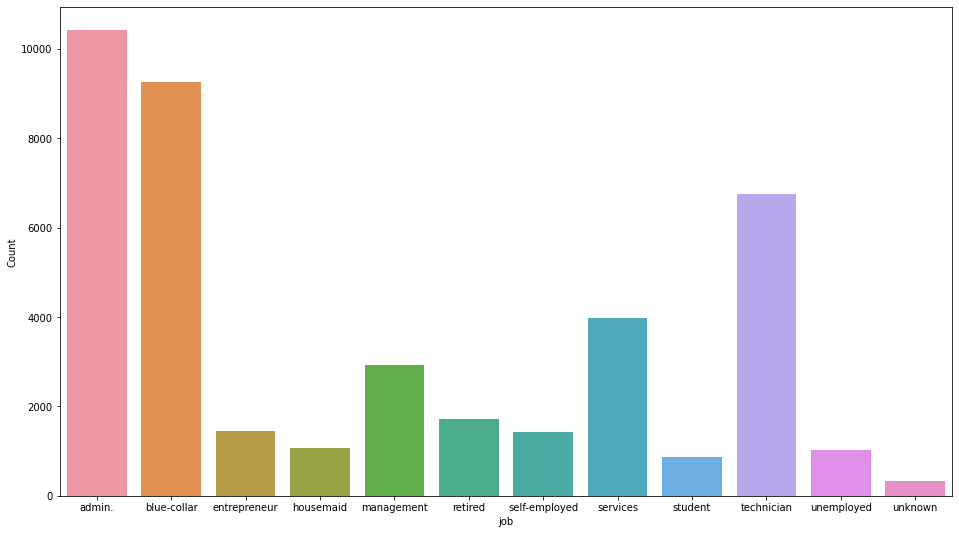

In [6]:
fig = plt.figure(figsize=(16, 9))
df_number_of_jobs = df.groupby(['job']).job.count().reset_index(name='Count')
sns.barplot(data=df_number_of_jobs, y='Count', x='job')
df.job.value_counts()


## Marital overview

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

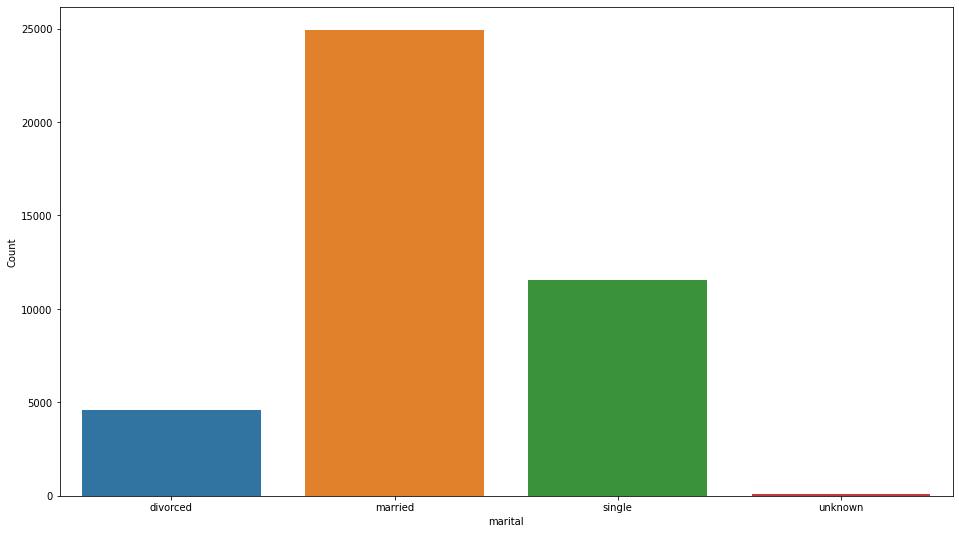

In [7]:
fig = plt.figure(figsize=(16, 9))
df_number_of_jobs = df.groupby(['marital']).job.count().reset_index(name='Count')
sns.barplot(data=df_number_of_jobs, y='Count', x='marital')
df.marital.value_counts()

## Education overview

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

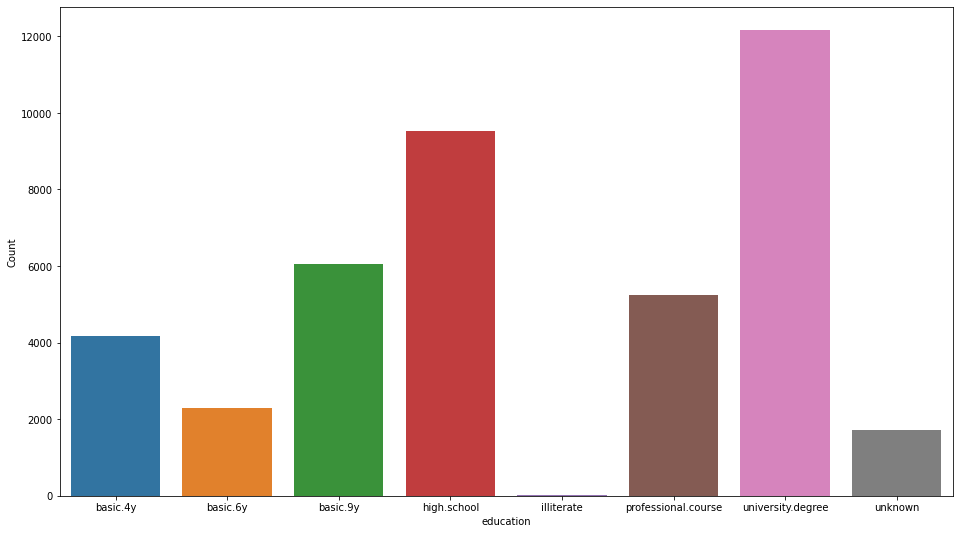

In [8]:
fig = plt.figure(figsize=(16, 9))
df_number_of_jobs = df.groupby(['education']).education.count().reset_index(name='Count')
sns.barplot(data=df_number_of_jobs, y='Count', x='education')
df.education.value_counts()

### Looks like we are dealing mostly with hired peole with university degree and most of them are maried
Its just a orientatonial based on top values from graphs above`

## Lets get into exploration based on relations in points of interest
### What I want to achive
I think the final result should be which people are most interested to become a subscriber and what are the important atributes for this dissision 

## Call Duration matter ?


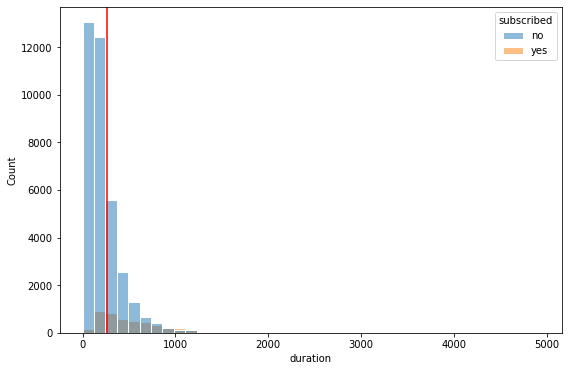

In [75]:
fig = plt.figure(figsize=(9, 6))
sns.histplot(data=df, x=df.duration, bins=40, edgecolor='white', color='green', hue='subscribed')
plt.axvline(df.duration.mean(), color='red')

In [40]:
call_mean = df.duration.mean()
df_left = df.loc[ df.duration < call_mean, :]
df_right = df.loc[ df.duration >= call_mean, :]

df_left.shape[0] / df.shape[0],  df_right.shape[0] / df.shape[0], call_mean


(0.6682286102748374, 0.3317713897251627, 258.2850101971448)

So 33% people has longer call then 258sec.
Lets look how it affects the subscription

In [52]:
#Relative to the left or right size
print(df_left.loc[df_left.subscribed =='yes'].shape[0] / df_left.shape[0], df_right.loc[df_right.subscribed =='yes'].shape[0] / df_right.shape[0])
#Relative to full df size
print(df_left.loc[df_left.subscribed =='yes'].shape[0] / df.shape[0], df_right.loc[df_right.subscribed =='yes'].shape[0] / df.shape[0])


0.043563565018348294 0.2518111964873765
0.029110420510828395 0.0835437506069729


It looks call duration matters, but its propably more who are interested.
If we were building desicion model we dont know the call duration, becoause its somethink what we will know after the call.

## Which month and day are the best for a call

,month,subscribed,Count
0,apr,no,2093
1,apr,yes,539
2,aug,no,5523
3,aug,yes,655
4,dec,no,93
5,dec,yes,89
6,jul,no,6525
7,jul,yes,649
8,jun,no,4759
9,jun,yes,559


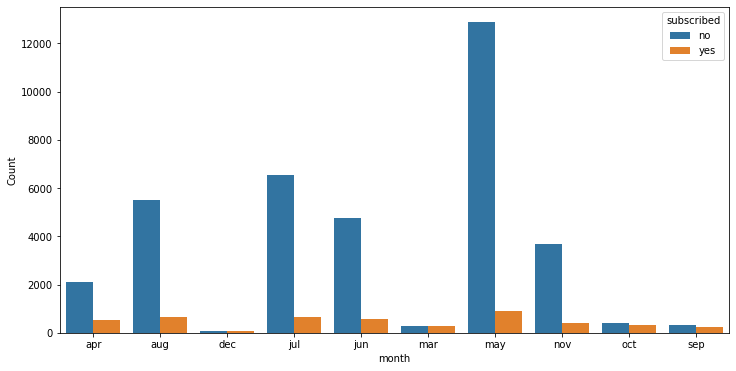

In [77]:
fig = plt.figure(figsize=(12, 6))
df_agg = df.groupby(['month', 'subscribed']).month.count().reset_index(name='Count')
sns.barplot(data=df_agg, x='month', y='Count', hue='subscribed')
df_agg


In [102]:
df_agg.loc[df_agg.subscribed == 'yes']

,month,subscribed,Count
1,apr,yes,539
3,aug,yes,655
5,dec,yes,89
7,jul,yes,649
9,jun,yes,559
11,mar,yes,276
13,may,yes,886
15,nov,yes,416
17,oct,yes,315
19,sep,yes,256


We can try to calculate 'yes' ratio for each month

In [91]:
best_ratio = ('',0)
for (idx, m) in enumerate(df.month.unique()):
    ratio = df.loc[(df.month == m) & (df.subscribed == 'yes')].shape[0] / df.loc[df.month == m].shape[0]
    if(ratio > best_ratio[1]):
        best_ratio = (m, ratio)
    print(m, np.round(ratio,2))

best_ratio

may 0.06
jun 0.11
jul 0.09
aug 0.11
oct 0.44
nov 0.1
dec 0.49
mar 0.51
apr 0.2
sep 0.45


('mar', 0.5054945054945055)

March has best ratio in terms of performed calls by that month

## Do people with loans ivenst ?

## Did they change mind after previous capaign ?

## Do people with higher education invset more ?

<AxesSubplot:xlabel='subscribed', ylabel='job'>

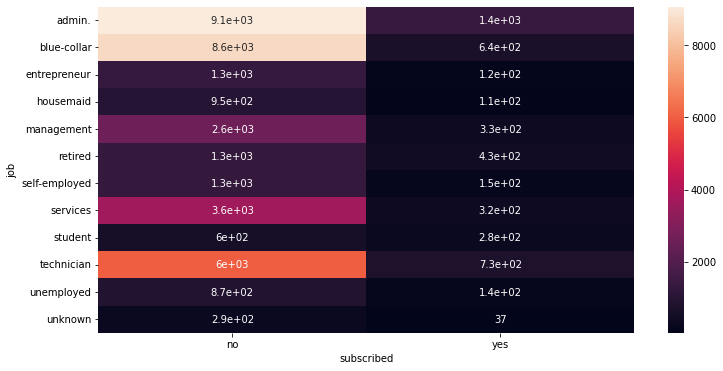

In [112]:
df_agg = df.groupby(['job', 'subscribed']).job.count().reset_index(name='count')
df_agg
plt.figure(figsize=(12, 6))
sns.heatmap(data=df_agg.pivot(index='job', columns='subscribed', values='count'),  cmap='RdYlGn',annot=True)